<a href="https://colab.research.google.com/github/offdocudev/Machine-Learning/blob/master/Catdognet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from IPython.display import clear_output

# DATA - https://www.kaggle.com/c/digit-recognizer/data
# Kaggle 
! pip install kaggle
! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
# Or manually copy credentials in kaggle.json file 

!  echo '{"username":"offdocudev","key":"a6893bc3aa38aec8a688959083e82644"}' > /root/.kaggle/kaggle.json


! cat /root/.kaggle/kaggle.json
! chmod 600 /root/.kaggle/kaggle.json

# Downlaod data


#################### DOWNLOAD AND UNZIP FILE SAVED IN DRIVE ####################

!pip install -U -q PyDrive

# HERE YOUR FILE ID ( GET IT WITH THE SHARING URL: https://drive.google.com/open?id=1Soh3zXLXt2lT7b_3FcWWyeOCC7SnOxK0 )
zip_id = '1Soh3zXLXt2lT7b_3FcWWyeOCC7SnOxK0'

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Using TensorFlow backend.


{"username":"offdocudev","key":"a6893bc3aa38aec8a688959083e82644"}
    100% |████████████████████████████████| 993kB 20.9MB/s 


In [0]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 265M/271M [00:05<00:00, 64.5MB/s]
100% 271M/271M [00:05<00:00, 50.3MB/s]
 98% 534M/544M [00:10<00:00, 30.1MB/s]
100% 544M/544M [00:10<00:00, 54.2MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 38.3MB/s]


In [0]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import cv2,random
import numpy as np
import pandas as pd
from matplotlib import ticker  
import seaborn as sns


In [0]:
zip_ref = zipfile.ZipFile('train.zip','r')
zip_ref.extractall()
zip_ref.close()

In [0]:
zip_ref = zipfile.ZipFile('test.zip','r')
zip_ref.extractall()
zip_ref.close()

In [0]:
print(os.listdir('/content/test/'))

['277.jpg', '3251.jpg', '6279.jpg', '5882.jpg', '3279.jpg', '9410.jpg', '6296.jpg', '10448.jpg', '3043.jpg', '2310.jpg', '7602.jpg', '4586.jpg', '2063.jpg', '8760.jpg', '7905.jpg', '2944.jpg', '8783.jpg', '5083.jpg', '7630.jpg', '5976.jpg', '9488.jpg', '1041.jpg', '11261.jpg', '9853.jpg', '3436.jpg', '1730.jpg', '327.jpg', '3862.jpg', '6143.jpg', '2270.jpg', '7227.jpg', '10915.jpg', '951.jpg', '2466.jpg', '6307.jpg', '5359.jpg', '6348.jpg', '1323.jpg', '3471.jpg', '9739.jpg', '11389.jpg', '1023.jpg', '5171.jpg', '1234.jpg', '12197.jpg', '10237.jpg', '2002.jpg', '10123.jpg', '11018.jpg', '4508.jpg', '11264.jpg', '425.jpg', '11582.jpg', '1631.jpg', '1548.jpg', '1123.jpg', '2733.jpg', '5222.jpg', '4293.jpg', '8693.jpg', '12198.jpg', '5150.jpg', '8676.jpg', '1379.jpg', '3586.jpg', '8873.jpg', '2117.jpg', '9416.jpg', '2606.jpg', '5529.jpg', '119.jpg', '6281.jpg', '4119.jpg', '837.jpg', '5837.jpg', '6256.jpg', '2067.jpg', '2558.jpg', '1112.jpg', '7358.jpg', '4245.jpg', '6147.jpg', '4196.jpg'

In [0]:
train_dir = '/content/train/'
test_dir = '/content/test/'

In [0]:
rows = 200
cols = 200
channels = 3

In [0]:
train_images = [train_dir + i for i in os.listdir(train_dir)]


In [0]:
len(train_images)

25000

In [0]:
train_dogs = [train_dir+ i for i in os.listdir(train_dir) if 'dog' in i]

train_cats = [train_dir + i for i in os.listdir(train_dir) if 'cat' in i]

In [0]:
len(train_cats)

12500

In [0]:
test_images = [test_dir +i for i in os.listdir(test_dir)]


In [0]:
test_images = test_images[:2000]
len(test_images)

2000

In [0]:
random.shuffle(train_images)

train_images = train_dogs[:5000] + train_cats[:5000]

test_images = test_images[:2000]

In [0]:
def read_image(file_path):
  img = cv2.imread(file_path,cv2.IMREAD_COLOR)
  return cv2.resize(img,(rows,cols),interpolation = cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
  count = len(images)
  data = np.ndarray((count,channels,rows,cols),dtype = np.uint8)
  
  for i,image_file in enumerate(images):
      image = read_image(image_file)
      data[i] = image.T
      if i%1000 == 0:
        print('Processed {} o {}'.format(i,count))
  return data

In [0]:
train = prep_data(train_images)
#test = prep_data(test_images)

Processed 0 o 10000
Processed 1000 o 10000
Processed 2000 o 10000
Processed 3000 o 10000
Processed 4000 o 10000
Processed 5000 o 10000
Processed 6000 o 10000
Processed 7000 o 10000
Processed 8000 o 10000
Processed 9000 o 10000


In [0]:
train.shape

(10000, 3, 200, 200)

In [0]:
test = prep_data(test_images)

Processed 0 o 2000
Processed 1000 o 2000


In [0]:
test.shape

(2000, 3, 200, 200)

In [0]:
labels = []
for i in train_images:
  if 'dog' in i:
    labels.append(1)
  else:
    labels.append(0)

In [0]:
labels[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [0]:
train_images[:10]

['/content/train/dog.11644.jpg',
 '/content/train/dog.2343.jpg',
 '/content/train/dog.7420.jpg',
 '/content/train/dog.8823.jpg',
 '/content/train/dog.9051.jpg',
 '/content/train/dog.10527.jpg',
 '/content/train/dog.8774.jpg',
 '/content/train/dog.3924.jpg',
 '/content/train/dog.10809.jpg',
 '/content/train/dog.144.jpg']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


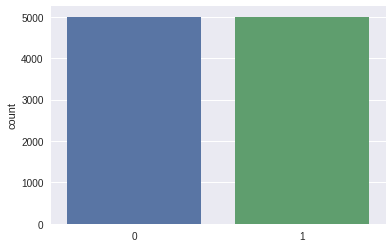

In [0]:
sns.countplot(labels)

In [0]:
def show_cats_and_dogs(idx):
  cat = read_image(train_cats[idx])
  dog = read_image(train_dogs[idx])
  pair = np.concatenate((cat,dog),axis =1)
  plt.figure(figsize = (5,5))
  plt.imshow(pair)
  plt.show()

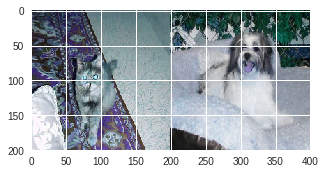

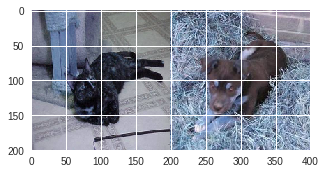

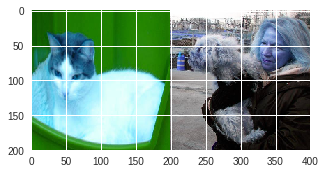

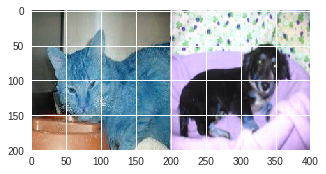

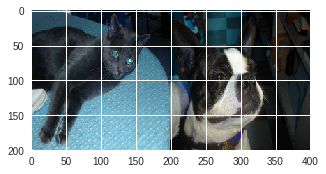

In [0]:
for idx in range(0,5):
  show_cats_and_dogs(idx)

In [0]:
from keras.models import Sequential
from keras.layers import Input,Dropout,Conv2D,MaxPooling2D,Dense,Activation,Flatten
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(512,(5,5),padding = 'same', input_shape = (3,rows,cols),activation = 'relu'))
#model.add(Conv2D(512,(1,1),padding ='same',activation='relu',input_shape = (3,rows,cols)))
model.add(MaxPooling2D(data_format = 'channels_first',pool_size =(2,2)))

model.add(Conv2D(1024,(5,5),padding = 'same', activation = 'relu'))
#model.add(Conv2D(1024,(1,1),padding ='same',activation='relu'))
model.add(MaxPooling2D(data_format = 'channels_first',pool_size =(2,2)))



model.add(Conv2D(512,(5,5),padding = 'same', activation = 'relu'))
#model.add(Conv2D(512,(1,1),padding ='same',activation='relu'))
model.add(MaxPooling2D(data_format = 'channels_first',pool_size =(2,2)))


model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(1,activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics =['acc'])



In [0]:
model.fit(train,labels,batch_size = 1024,epochs =10,validation_split = 0.3,verbose =1)

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 183s 26ms/step - loss: 4.5550 - acc: 0.7143 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/10
7000/7000 [==============================] - 111s 16ms/step - loss: 4.5550 - acc: 0.7143 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 3/10
7000/7000 [==============================] - 111s 16ms/step - loss: 4.5550 - acc: 0.7143 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 4/10
7000/7000 [==============================] - 111s 16ms/step - loss: 4.5550 - acc: 0.7143 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 5/10
7000/7000 [==============================] - 111s 16ms/step - loss: 4.5550 - acc: 0.7143 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 6/10
7000/7000 [==============================] - 111s 16ms/step - loss: 4.5550 - acc: 0.7143 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 7/10
7000/7000 [==============================] - 110s 16ms/step - loss: 4.5550 - acc: 0.7143 

In [0]:
predictions = model.predict(test,verbose =0)

I am 100.00% sure this is a dog


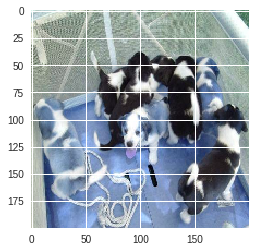

I am 100.00% sure this is a dog


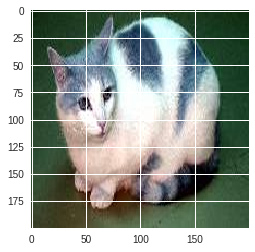

I am 100.00% sure this is a dog


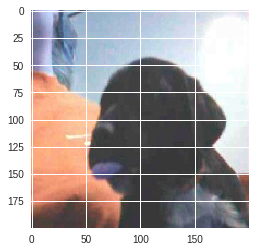

I am 100.00% sure this is a dog


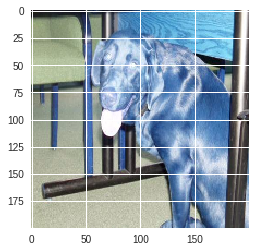

I am 100.00% sure this is a dog


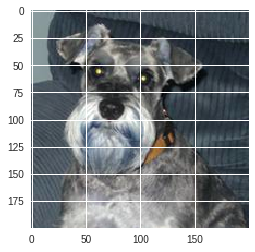

I am 100.00% sure this is a dog


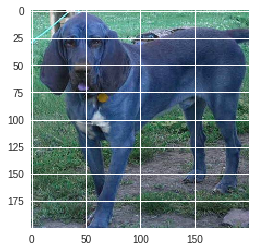

I am 100.00% sure this is a dog


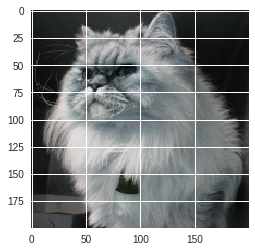

I am 100.00% sure this is a dog


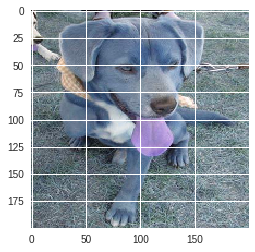

I am 100.00% sure this is a dog


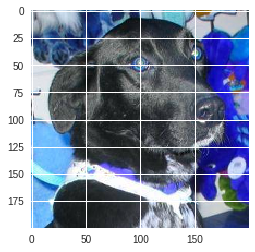

I am 100.00% sure this is a dog


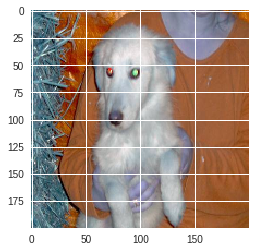

I am 100.00% sure this is a dog


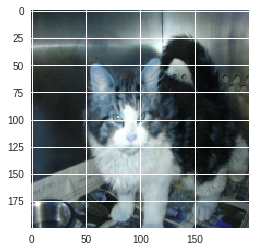

I am 100.00% sure this is a dog


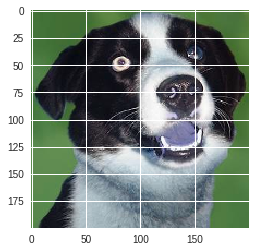

I am 100.00% sure this is a dog


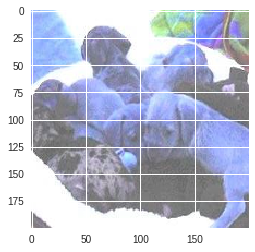

I am 100.00% sure this is a dog


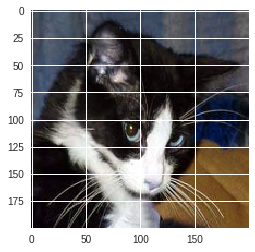

I am 100.00% sure this is a dog


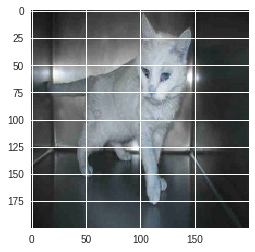

I am 100.00% sure this is a dog


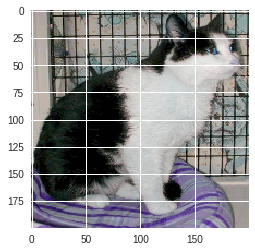

I am 100.00% sure this is a dog


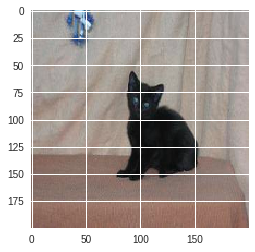

I am 100.00% sure this is a dog


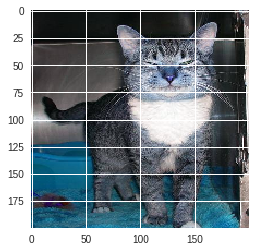

I am 100.00% sure this is a dog


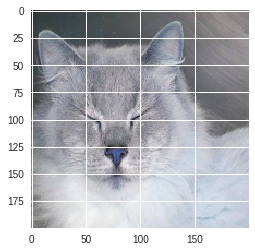

I am 100.00% sure this is a dog


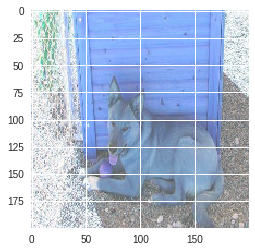

I am 100.00% sure this is a dog


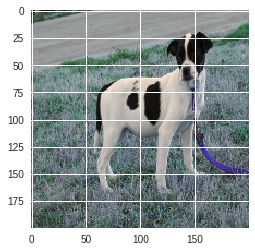

I am 100.00% sure this is a dog


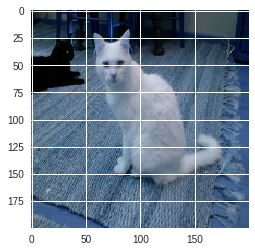

I am 100.00% sure this is a dog


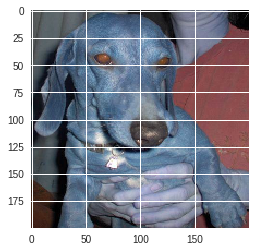

I am 100.00% sure this is a dog


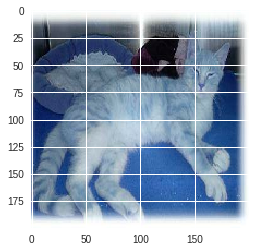

I am 100.00% sure this is a dog


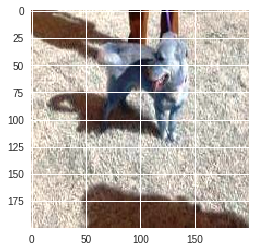

In [0]:
for i in range(0,25):
  if predictions[i,0] >=0.5:
    print('I am {:.2%} sure this is a dog'.format(predictions[i][0]))
    
  else:
      print('I am {:.2%} sure this is a cat'.format(1-predictions[i][0]))
      
  plt.imshow(test[i].T)
  plt.show()
   